In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import scipy
import re
from scipy import spatial
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
tokenizer = ToktokTokenizer()
import gensim
from gensim.models import Word2Vec
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
data=pd.read_csv("C:/Users/Derya/Downloads/flipkart_com-ecommerce_sample.csv")
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [3]:
data.shape


(20002, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  object 
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [5]:
data['length']=data['description'].str.len()

In [16]:
data['description'].fillna('', inplace=True)
data['no_of_words'] = data.description.apply(lambda x : len(x.split()))



Text(0.5, 1.0, 'Word distribution per bin')

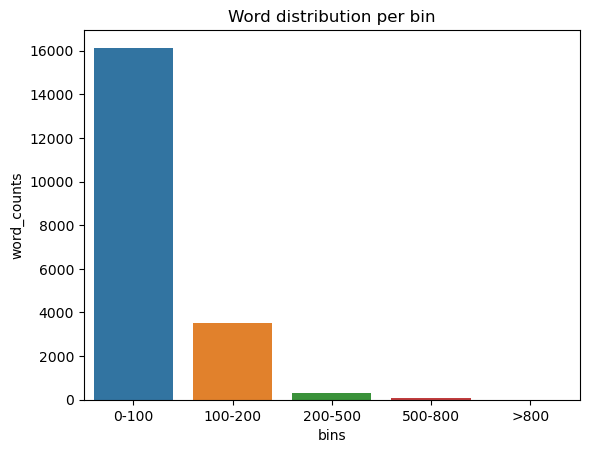

In [18]:
bins=[0,50,75, np.inf]
data['bins']=pd.cut(data.no_of_words, bins=[0,100,300,500,800, np.inf],labels=['0-100', '100-200', '200-500','500-800' ,'>800'])
words_distribution = data.groupby('bins').size().reset_index().rename(columns={0:'word_counts'})
sns.barplot(x='bins', y='word_counts', data=words_distribution).set_title("Word distribution per bin")

In [20]:
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0: 'missing'})
# Create a percentage of missing values
missing['percent'] = missing['missing'] / len(data)
missing.sort_values('percent', ascending = False)

,missing,percent
brand,5866,0.293271
retail_price,80,0.004000
discounted_price,80,0.004000
product_specifications,16,0.000800
image,5,0.000250
bins,4,0.000200
length,4,0.000200
product_rating,2,0.000100
overall_rating,2,0.000100
uniq_id,2,0.000100


In [21]:
# Remove punctuation
data['description'] = data['description'].str.replace(r'[^\w\d\s]', ' ')
# Replace whitespace between terms with a single space
data['description'] = data['description'].str.replace(r'\s+', ' ')
# Remove leading and trailing whitespace
data['description'] = data['description'].str.replace(r'^\s+|\s+?$', '')
# converting to lower case
data['description'] = data['description'].str.lower()
data['description'].head()

0    key features of alisha solid women s cycling s...
1    fabhomedecor fabric double sofa bed finish col...
2    key features of aw bellies sandals wedges heel...
3    key features of alisha solid women s cycling s...
4    specifications of sicons all purpose arnica do...
Name: description, dtype: object

In [22]:
# Removing Stop words
stop = stopwords.words('english')

In [25]:
pattern = r'\b(?:{})\b'.format('|'.join(stop))
data['description'] = data['description'].str.replace(pattern, '')
# Removing single characters
data['description'] = data['description'].str.replace(r'\s+', ' ')
data['description'] = data['description'].apply(lambda x: " ".join(x for x in x.split() if len(x)>1))
# Removing domain related stop words from description
specific_stop_words = [ "rs","flipkart","buy","com","free","day","cash","replacement","guarantee","genuine","key","feature","delivery","products","product","shipping", "online","shop"]
data['description'] = data['description'].apply(lambda x: " ".join(x for x in x.split() if x not in specific_stop_words))
data['description'].head()

0    features alisha solid women cycling shorts cot...
1    fabhomedecor fabric double sofa bed finish col...
2    features aw bellies sandals wedges heel casual...
3    features alisha solid women cycling shorts cot...
4    specifications sicons purpose arnica dog shamp...
Name: description, dtype: object

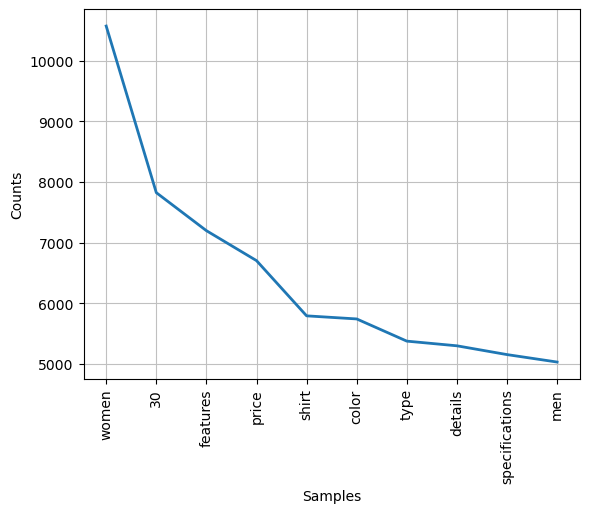

[('women', 10574), ('30', 7826), ('features', 7199), ('price', 6705), ('shirt', 5794), ('color', 5743), ('type', 5377), ('details', 5300), ('specifications', 5155), ('men', 5032)]


In [26]:
#Top frequent words after removing domain related stop words
a = data['description'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
word_dist.plot(10,cumulative=False)
print(word_dist.most_common(10))

In [27]:
#text cleaning
data['description'] = data['description'].fillna('')
#define the vectorizer
T_vec = TfidfVectorizer(stop_words='english')
# get the vectors
T_vec_matrix = T_vec.fit_transform(data['description'])
#shape
T_vec_matrix.shape

(20002, 26162)

In [28]:
product_index = pd.Series(data.index, index=data['product_name']).drop_duplicates()

In [29]:
product_index

product_name
Alisha Solid Women's Cycling Shorts            0
FabHomeDecor Fabric Double Sofa Bed            1
AW Bellies                                     2
Alisha Solid Women's Cycling Shorts            3
Sicons All Purpose Arnica Dog Shampoo          4
                                           ...  
Elite Collection Medium Acrylic Sticker    19997
Elite Collection Medium Acrylic Sticker    19998
Elite Collection Medium Acrylic Sticker    19999
NaN                                        20000
NaN                                        20001
Length: 20002, dtype: int64

In [30]:
def predict_products(text):
    # getting index
    index = product_index[text]
    # Obtaining the pairwsie similarity scores
    score_matrix = linear_kernel(T_vec_matrix[index], T_vec_matrix)
    matching_sc= list(enumerate(score_matrix[0]))
    # Sort the product based on the similarity scores
    matching_sc= sorted(matching_sc, key=lambda x: x[1], reverse=True)
    # Getting the scores of the 10 most similar product
    matching_sc= matching_sc[1:10]
    # Getting the product indices
    product_indices = [i[0] for i in matching_sc]
    # Show the similar products
    return data['product_name'].iloc[product_indices]

In [ ]:
recommended_product = predict_products(input("Enter a product name: "))
if recommended_product is not None:
    
    print ("Similar products")
    print("\n")
    for product_name in recommended_product:
        print (product_name)

In [ ]:
fin=[]
for i in range(len(data['description'])):
    
    temp=[]
    temp.append(data['description'][i])
    fin = fin + temp
data1 = data[['product_name','description']]

In [ ]:
import the word2vec
from gensim.models import KeyedVectors
filename = 'C:\\GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True, limit=50000)
#Preprocessing
def remove_stopwords(text, is_lower_case=False):
    
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', text[0])
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop]
        filtered_text = ' '.join(filtered_tokens)
        return filtered_text

In [ ]:
def get_embedding(word):
    if word in model.wv.vocab:
        return model[word]
    else:
        return np.zeros(300)

In [ ]:
out_dict = {}
for sen in fin:
    average_vector = (np.mean(np.array([get_embedding(x) for x in nltk.word_tokenize(remove_stopwords(sen))]), axis=0))
    dict = { sen : (average_vector) }
    out_dict.update(dict)

In [ ]:
# Get the similarity between the query and documents
def get_sim(query_embedding, average_vector_doc):
    sim = [(1 - scipy.spatial.distance.cosine(query_embedding, average_vector_doc))]
    return sim

In [ ]:
# Rank all the documents based on the similarity
def Ranked_documents(query):
    global rank
    query_words = (np.mean(np.array([get_embedding(x) for x in nltk.word_tokenize(query.lower())],dtype=float), axis=0))
    rank = []
    for k,v in out_dict.items():
        rank.append((k, get_sim(query_words, v)))
    rank = sorted(rank,key=lambda t: t[1], reverse=True)
    dd =pd.DataFrame(rank,columns=['Desc','score'])
    rankfin = pd.merge(data1,dd,left_on='description',right_on='Desc')
    rankfin = rankfin[['product_name','description','score']]
    print('Ranked Documents :')
    return rankfin

In [ ]:
# Call the IR function with a query
query=input("What would you like to search")
Ranked_documents(query)